# Examples in Python

## 1. Similar to english language

The syntax of Python is often similar to the english language. If you read a python program, you understand the code by reading:

In [1]:
print('Hello world!')  # prints Hello world!

Hello world!


In [2]:
print('Hello' in ['Hello', 'world'])

True


In [ ]:
if 10 > 1:
    print('10 is larger than 1')

---

## 2. Similar to Pseudocode

Python code very often looks very similar to Pseudo code. Here an example of the [Quicksort-algorithm](https://en.wikipedia.org/wiki/Quicksort).

### Quicksort Pseudocode from Wikipedia

### Here the Python implementation (Thomas Erben)

In [3]:
import random

# A python implementation of the Wikipedia quicksort algorithm
def my_quicksort(array):
    if len(array) <= 1:
        return array
    
    pivot = array[0] # select a pivot (first element of list)
    rest = array[1:] # the array with the pivot
                     # removed
    less = [x for x in rest if x <= pivot]
    greater = [x for x in rest if x > pivot]
    
    return my_quicksort(less) + [pivot] + my_quicksort(greater)

testarr = [random.randint(-1000, 1000) for i in range(30)]
print(testarr)
print(my_quicksort(testarr))

[313, -495, 188, 153, 657, 796, 653, -160, -486, -325, 971, -73, -613, -871, 965, 177, -700, -76, -507, 766, 881, -477, 861, 930, 483, 354, 242, -44, 536, 881]
[-871, -700, -613, -507, -495, -486, -477, -325, -160, -76, -73, -44, 153, 177, 188, 242, 313, 354, 483, 536, 653, 657, 766, 796, 861, 881, 881, 930, 965, 971]


---

## 3. Data analysis/visualization

This is a typical analysis/visualization data flow in python. Typically there are these steps:
 * reading data
 * data selection (masking unwanted points)
 * calculate results
 * plot the data and results

We start with some text data, which you can read with a unix command (unix commands can be started with `!command`):

In [4]:
# read the first 20 lines of data/pg1605_16.05.2001.dat
!head -20 data/pg1605_16.05.2001.dat

# 
# This is the dataset for a time series observation of the star
# PG1605+072 at 16.05.2001 in the R-band
# 
# The 1st column are time information in seconds,
# the 2nd column contain the brightness in mmag
#     
1.455480500000000000e+06 4.883301041715260453e+02
1.455529899999999907e+06 4.630945860326501133e+02
1.455580000000000000e+06 4.412436136735310015e+02
1.455629899999999907e+06 4.358508360468990190e+02
1.455729949999999953e+06 3.704169374794932423e+02
1.455780199999999953e+06 4.706135097782197931e+02
1.455829899999999907e+06 4.697404246316214653e+02
1.455880000000000000e+06 4.627780534775134242e+02
1.455930000000000000e+06 4.679719778543143320e+02
1.456028899999999907e+06 4.291045555825820088e+02
1.456078000000000000e+06 4.020010871315660097e+02
1.456127899999999907e+06 4.155084212283115903e+02
1.456176899999999907e+06 4.313595045147935707e+02


The final program in the notebook:

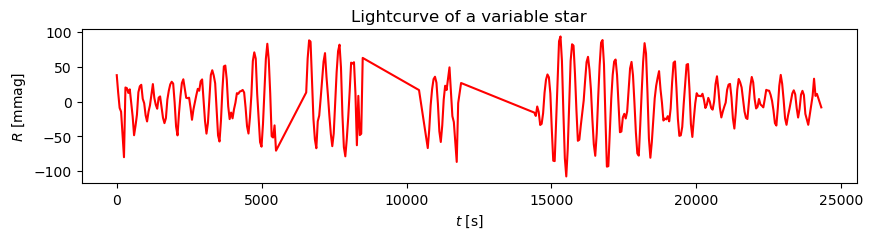

In [7]:
%matplotlib inline
    
import numpy as np
import matplotlib.pyplot as plt

# load the data and split into variables
data = np.loadtxt('data/pg1605_16.05.2001.dat')
times = data[:,0]
mmags = data[:,1]

# mask unwanted data points
mask = (mmags < 600) & (mmags > 0.)
times = times[mask]
mmags = mmags[mask]

# calculate some information
mmags_mean = mmags.mean()

# setup the plot
fig, ax = plt.subplots(figsize=[10,2])

# plot the data
ax.plot(times-times[0], mmags-mmags_mean, 'r-')
ax.set_title('Lightcurve of a variable star')
ax.set_ylabel(r'$R$ [mmag]')
ax.set_xlabel(r'$t$ [s]');

---

## 4. Load programs into Jupyter Notebook

You can interactively load python code from a local disk or from the internet:

In [8]:
# %load code/lightcurve.py
import numpy as np
import matplotlib.pyplot as plt

# load the data and split into variables
data = np.loadtxt('data/pg1605_16.05.2001.dat')
times = data[:,0]
mmags = data[:,1]

# mask unwanted data points
mask = (mmags < 600) & (mmags > 0.)
times = times[mask]
mmags = mmags[mask]

# calculate some information
mmags_mean = mmags.mean()

# setup the plot
fig, ax = plt.subplots(figsize=[10,2])

# plot the data
ax.plot(times-times[0], mmags-mmags_mean, 'r-')
ax.set_title('Lightcurve of a variable star')
ax.set_ylabel(r'$R$ [mmag]')
ax.set_xlabel(r'$t$ [s]');

plt.savefig('lightcurve.png')


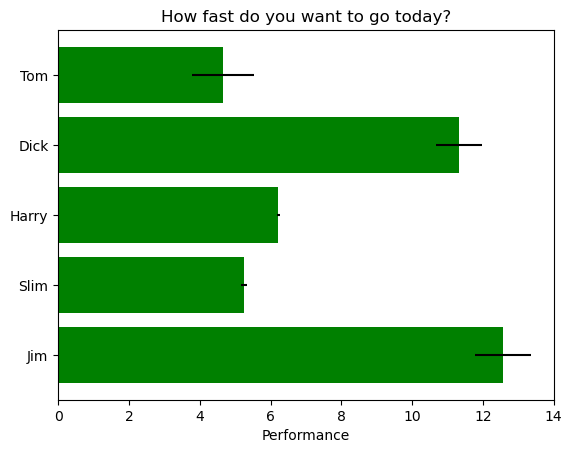

In [10]:
# %load https://matplotlib.org/mpl_examples/lines_bars_and_markers/barh_demo.py
"""
====================
Horizontal bar chart
====================

This example showcases a simple horizontal bar chart.
"""
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()


---

## 5. Capabilities for symbolic mathematics (sympy-module)

The Python `sympy`-module has symbolic mathematic capabilities similar to Maple or Mathematica.

In [11]:
import sympy as sp

sp.init_printing()

# declare symbolic variables and functions:
x, y, z, t = sp.symbols('x y z t')
f = sp.Function('f')

Nicely write down an Integral

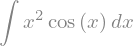

In [12]:
sp.Integral(x**2 * sp.cos(x), x)

solve the integral symbolically

In [13]:
sp.Integral(x**2 * sp.cos(x), x).doit()

solve a differential equation

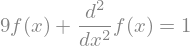

In [14]:
sp.Eq(sp.Derivative(f(x),x,x) + 9*f(x), 1)

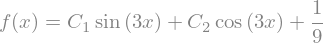

In [15]:
sp.dsolve(sp.Eq(sp.Derivative(f(x),x,x) + 9*f(x), 1), f(x))

calculate symbolically the inverse of a matrix

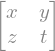

In [16]:
A = sp.Matrix(2, 2, [x, y, z, t])
A

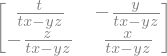

In [17]:
A.inv()

show the first 50 digits of $\pi$.

In [18]:
sp.pi.evalf(50)

---

## 6. Python is not slow - use vector operations

Python is often declared as slow... in some cases you can use an effective technique to speedup your code.

A typical example is the manipulation of an array. In C/Fortran you have to visit each element for the manipulation, which is indeed very slow in Python and should be avoided:

In [19]:
import numpy as np

x = np.linspace(0.0, 2.0 * np.pi, 100)
print(x)

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

In [20]:
%%timeit
import numpy as np

# C-like element-wise array manipulation
x = np.linspace(0.0, 2.0 * np.pi, 100)

y = np.zeros(len(x))     # define the result array
for i in range(len(x)):
    y[i] = np.sin(x[i])

175 µs ± 6.48 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


The Python `numpy`-Module is offering vector operations, which are typically by a factor of 10 faster than the *visit each element* strategy. Additionally, the resulting code is shorter and fail safe.

In [21]:
%%timeit
import numpy as np

# fast vector operations
x = np.linspace(0.0, 2.0 * np.pi, 100)
y = np.sin(x)

36.9 µs ± 2.09 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


---

## 7. Documentation

As you can see in this notebook, you can mix code with graphics and documentation. Also Jupyter-Nodebooks provides the possibility to embed other Web-elements:

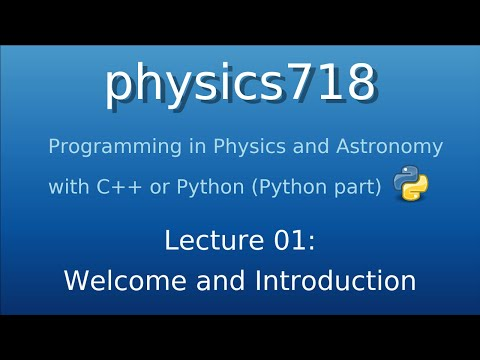

In [22]:
from IPython.display import YouTubeVideo

YouTubeVideo("VteSyQzRSyQ")